In [2]:
import echaim
import matplotlib.pyplot as plt
import numpy as np

from src.dionpy.modules.parallel import echaim_star

In [78]:
from datetime import datetime
import itertools
from tqdm import tqdm
from multiprocessing import Pool

NPROC = 16
BATCH = 50
N = 100

lats = np.linspace(55, 90, N)
lons = np.linspace(0, 360, N*2)
lats_m, lons_m = np.meshgrid(lats, lons)
lats_f = lats_m.flatten()
lons_f = lons_m.flatten()

nbatches = len(lats_f) // BATCH + 1
lats_b = np.array_split(lats_f, nbatches)
lons_b = np.array_split(lons_f, nbatches)

alts = np.linspace(150, 501, 100, dtype=np.float64)

dt = datetime(year=2020, month=9, day=17, hour=16, minute=0)

with Pool(NPROC) as pool:
    res_echaim = list(
                tqdm(
                    pool.imap(
                        echaim_star,
                        zip(
                            lats_b,
                            lons_b,
                            itertools.repeat(alts),
                            itertools.repeat(dt),
                            itertools.repeat(True),
                            itertools.repeat(True),
                            itertools.repeat(True),
                        ),
                    ),
                    total=nbatches,
                )
            )
ed = np.vstack(res_echaim)

100%|██████████| 401/401 [01:28<00:00,  4.54it/s]


In [76]:
edens = ed.copy()
edens = edens.reshape((len(lons), len(lats), len(alts)))
aver_edens = np.average(edens, axis=2)

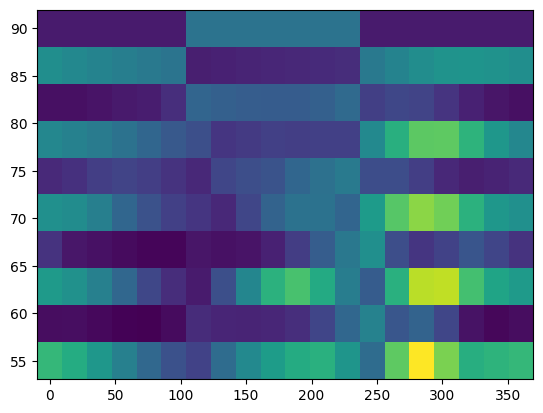

In [77]:
plt.pcolormesh(lons_m, lats_m, aver_edens)
plt.show()